# Day 2 Continuing with inmuebles_bogota.csv file

In [213]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Importing data

In [123]:
data=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\inmuebles_bogota.csv")

Writing a better name for columns just to not have future troubles 

In [124]:
data=data.rename(columns={"Área":"Area","Baños":"Banos"})

In [125]:
data.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


We can clearly see that "Valor" has an object type and we wanted with an "int" type

In [127]:
data.Valor.str.split() # we can apply string functions because is an object type. It returns a Series data with list
data.Valor.str.split(expand=True) #expand returns a new dataframe with the entrances of the list
# Check series.atributes for more info

,0,1
0,$,360.000.000
1,$,670.000.000
2,$,1.120.000.000
3,$,890.000.000
4,$,970.000.000
...,...,...
9515,$,290.000.000
9516,$,670.000.000
9517,$,900.000.000
9518,$,335.000.000


Save the column of the number (which still is a object type)

In [128]:
data["cost_millions"]=data.Valor.str.split(expand=True)[1]
data.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,cost_millions
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970.000.000


We need to erase the "." in the numbers

In [129]:
data.cost_millions=data.cost_millions.str.replace(".","",regex=True) # regex is to verify is a regular expression is written
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tipo           9520 non-null   object
 1   Descripcion    9520 non-null   object
 2   Habitaciones   9520 non-null   int64 
 3   Banos          9520 non-null   int64 
 4   Area           9520 non-null   int64 
 5   Barrio         9520 non-null   object
 6   UPZ            9478 non-null   object
 7   Valor          9520 non-null   object
 8   cost_millions  9520 non-null   object
dtypes: int64(3), object(6)
memory usage: 669.5+ KB


We change the cost_millions column type from object to float value

In [130]:
data.cost_millions=data.cost_millions.astype("float")/1000000
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   cost_millions  9520 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 669.5+ KB


In [131]:
data.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,cost_millions
1184,Casa,Casa en venta en Usme,1,1,40,Usme,USME: Alfonso López + Ciudad Usme,$ 120.000.000,120.00
5567,Apartamento,Apartamento en venta en Santa Ana,4,4,230,Santa Ana,Usaquén,$ 2.200.000.000,2200.00
2639,Apartamento,Apartamento en venta en Gran Granada,3,2,80,Gran Granada,Garcés Navas,$ 335.000.000,335.00
8946,Casa,Casa en venta en Engativa,2,2,230,Engativa,Engativá,$ 850.000.000,850.00
1428,Apartamento,Apartamento en venta en Nicolas De Federman,4,3,138,Nicolas De Federman,Teusaquillo,$ 480.000.000,480.00
7849,Apartamento,Apartamento en venta en Quinta Camacho,1,2,35,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 310.000.000,310.00
904,Apartamento,Apartamento en venta en Usaquén,4,3,115,Usaquén,Usaquén,$ 500.000.000,500.00
6648,Apartamento,Apartamento en venta en Santa Barbara,3,2,84,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 390.000.000,390.00
7836,Apartamento,Apartamento en venta en Gran Granada,3,2,52,Gran Granada,Garcés Navas,$ 200.000.000,200.00
1087,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,51,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 145.000.000,145.00


### Cambiar el número de decimales que se muestran en el df

In [132]:
pd.set_option("display.precision",2)
pd.set_option("display.float_format",lambda x: "%.2f" %x)
data.describe()

,Habitaciones,Banos,Area,cost_millions
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


## Strange Data

In [133]:
data[data.Habitaciones == data.Habitaciones.max()]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,cost_millions
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,480.00


In [134]:
data.loc[data.Banos == data.Banos.min()]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,cost_millions
2910,Edificio,Edificio en venta en Santa Barbara,22,0,1080,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 9.200.000.000,9200.00
8193,Casa,Casa en venta en Puente Aranda,15,0,450,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 1.000.000.000,1000.00
9451,Casa,Casa en venta en Bosa,10,0,540,Bosa,Bosa Central,$ 800.000.000,800.00


In [135]:
data[data.Area == data.Area.min()]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,cost_millions
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,180.00


<Axes: ylabel='Frequency'>

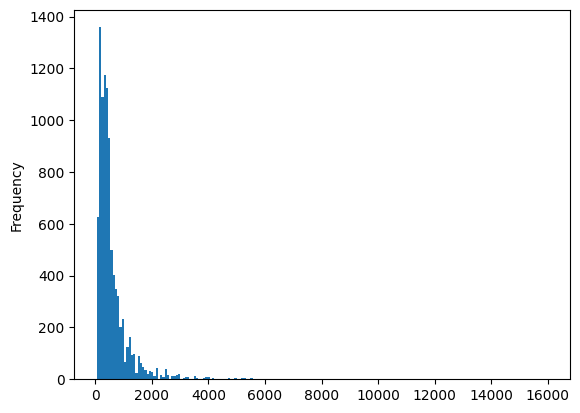

In [136]:
data.cost_millions.plot.hist(bins=200) #bins = number of classes of the histogram

## Data visualization with Seaborn and Matplotlib

Seaborn is matplotlib based. It creates better plots than Matplotlib.
Using both libraries we can create great plots and figures.

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

First we create a figure where we will make our graphic

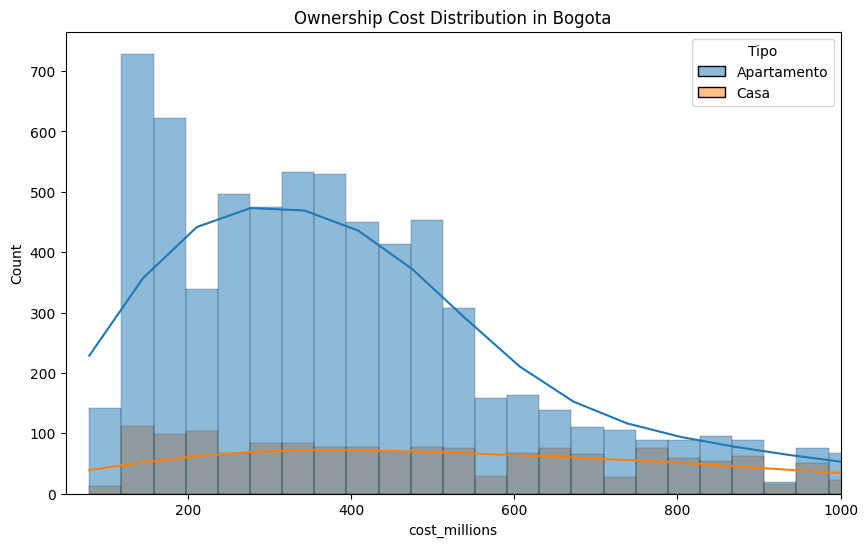

In [138]:
plt.figure(figsize=(10,6)) # create ploting space (width, height)
subset=data[(data.Tipo == "Casa") | (data.Tipo == "Apartamento")]
subset.head()
graph=sns.histplot(data=subset, x= "cost_millions", kde=True,hue="Tipo") # kde = kernel density estimate
#hue = divide x data into different categories that exist in an especific column 
graph.set_title("Ownership Cost Distribution in Bogota") # set title
plt.xlim((50,1000)) #set x range
#plt.ylim((0,5))
# plt.savefig("cost_distribution.png", format = "png") #if we want to save it in another folder, write folder's path
plt.show()

# Day 3

### **Get the cost/m2 by neighborhood** 

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   cost_millions  9520 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 669.5+ KB


In [140]:
data["c_a_m"] = data.cost_millions/data.Area #This way gives the cost/m2 by each property
data.groupby("Barrio").mean(numeric_only=True).head()


,Habitaciones,Banos,Area,cost_millions,c_a_m
Barrio,,,,,
Alameda,3.00,2.00,97.00,580.00,5.98
Alhambra,3.00,2.94,190.41,752.35,4.33
Andes Norte,3.00,2.86,124.86,709.57,6.05
Antonio Nariño,4.31,2.50,163.06,459.22,3.53
Barrancas,2.87,2.13,70.20,314.13,4.42


In [141]:
datos_barrio=data.groupby("Barrio").sum(numeric_only=True) #mean of all columns of numerical value
datos_barrio.c_a_m=datos_barrio["cost_millions"]/datos_barrio["Area"] # gives the cost/m2 by neighborhood
datos_barrio.head()

,Habitaciones,Banos,Area,cost_millions,c_a_m
Barrio,,,,,
Alameda,3,2,97,580.00,5.98
Alhambra,51,50,3237,12790.00,3.95
Andes Norte,21,20,874,4967.00,5.68
Antonio Nariño,207,120,7827,22042.65,2.82
Barrancas,43,32,1053,4712.00,4.47


 We will map the values of cost/m2 by neighborhood into our df called data

In [142]:
cost_nbhd=dict(datos_barrio.c_a_m)
cost_nbhd

{'Alameda': 5.979381443298969,
 'Alhambra': 3.95118937287612,
 'Andes Norte': 5.683066361556064,
 'Antonio Nariño': 2.816232272901495,
 'Barrancas': 4.4748338081671415,
 'Barrios Unidos': 2.9599171141243064,
 'Bella Suiza': 6.2905507012394,
 'Bellavista Occidental': 2.522711390635919,
 'Bochica': 3.4078212290502794,
 'Bogotá D.C': 5.212760277629472,
 'Bosa': 2.6778451358697213,
 'Bosa Piamonte': 1.175,
 'Bosa Porvenir': 3.1666666666666665,
 'Bosque De Pinos': 6.046475195822455,
 'Bosque Popular': 3.864097363083164,
 'Boyaca ': 2.637421499815294,
 'Buenos Aires': 2.6,
 'Candelaria La Nueva': 4.0625,
 'Cantagallo': 5.71920581655481,
 'Capellania': 4.316791690709752,
 'Casablanca': 6.245421245421245,
 'Castilla': 3.4035893155258763,
 'Cedritos': 5.027419586695463,
 'Cerros De Suba': 6.202830188679245,
 'Chapinero': 4.58018576602501,
 'Chapinero Alto': 6.4239336492891,
 'Chapinero Central': 6.360286919831224,
 'Chico Navarra': 5.1563019620884605,
 'Chico Norte': 8.353851040924855,
 'Chico 

Change the values to the neighborhood of each one, and then, with the key of my dictionary created, The cost/m2 by neighborhood will be set into each column of my original df

In [143]:
data.c_a_m=data.Barrio 
data.c_a_m=data.c_a_m.map(cost_nbhd)
data.head(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,cost_millions,c_a_m
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.00,4.57
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670.00,3.40
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1120.00,8.10


In [144]:
top_barrios=data.Barrio.value_counts()[:10].index# It works as a list
top_barrios

Index(['Usaquén', 'Zona Noroccidental', 'Bosa', 'Kennedy', 'Cedritos',
       'Barrios Unidos', 'Engativa', 'Suba', 'Santa Barbara', 'Chapinero'],
      dtype='object')

In [145]:
datos_barrio.reset_index(drop=False,inplace=True)
datos_barrio

,Barrio,Habitaciones,Banos,Area,cost_millions,c_a_m
0,Alameda,3,2,97,580.00,5.98
1,Alhambra,51,50,3237,12790.00,3.95
2,Andes Norte,21,20,874,4967.00,5.68
3,Antonio Nariño,207,120,7827,22042.65,2.82
4,Barrancas,43,32,1053,4712.00,4.47
...,...,...,...,...,...,...
144,Villa Maria,61,48,2693,5237.00,1.94
145,Villas De Granada,76,51,1905,6210.62,3.26
146,Villemar,53,37,1384,5469.00,3.95
147,Zona Franca,2,1,54,160.00,2.96


In [146]:
datos_barrio.query("Barrio in @top_barrios")


,Barrio,Habitaciones,Banos,Area,cost_millions,c_a_m
5,Barrios Unidos,1525,1196,87799,259877.76,2.96
10,Bosa,1743,789,34879,93400.56,2.68
22,Cedritos,1458,1348,53711,270027.73,5.03
24,Chapinero,892,913,81248,372130.93,4.58
50,Engativa,1676,1077,59808,172711.73,2.89
63,Kennedy,2151,1233,61475,207963.65,3.38
125,Santa Barbara,1073,1162,54693,320097.80,5.85
132,Suba,1497,1202,61615,266406.04,4.32
138,Usaquén,3109,3044,148121,837710.36,5.66
148,Zona Noroccidental,2778,2204,119084,544453.06,4.57


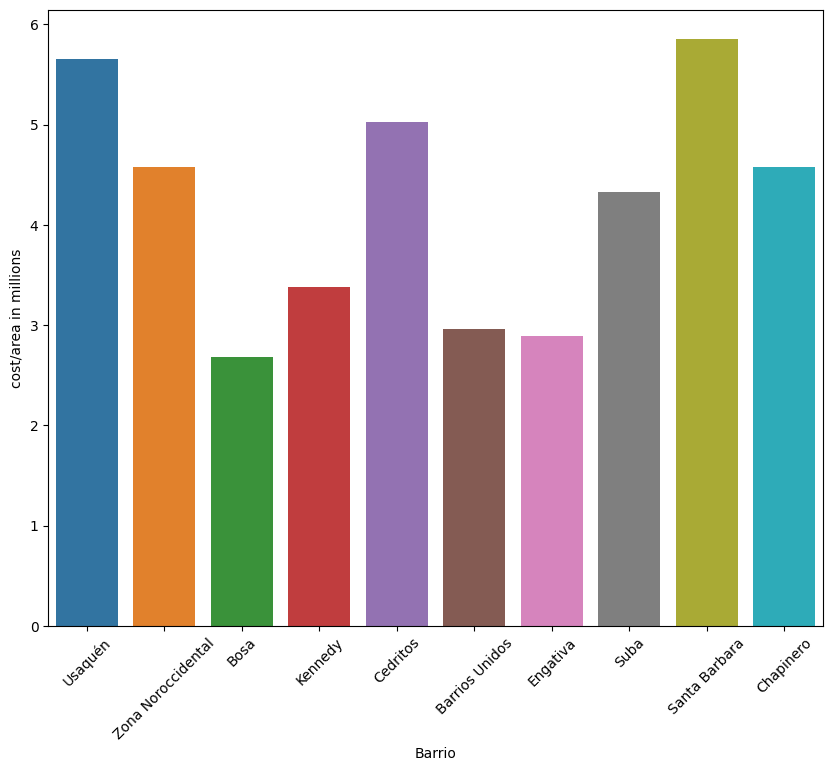

In [147]:
plt.figure(figsize=((10,8)))
ax=sns.barplot(data=datos_barrio.query("Barrio in @top_barrios"), x= "Barrio", y="c_a_m", order=top_barrios)
ax.set_ylabel("cost/area in millions")
ax.tick_params(axis="x", rotation=45)
plt.show()

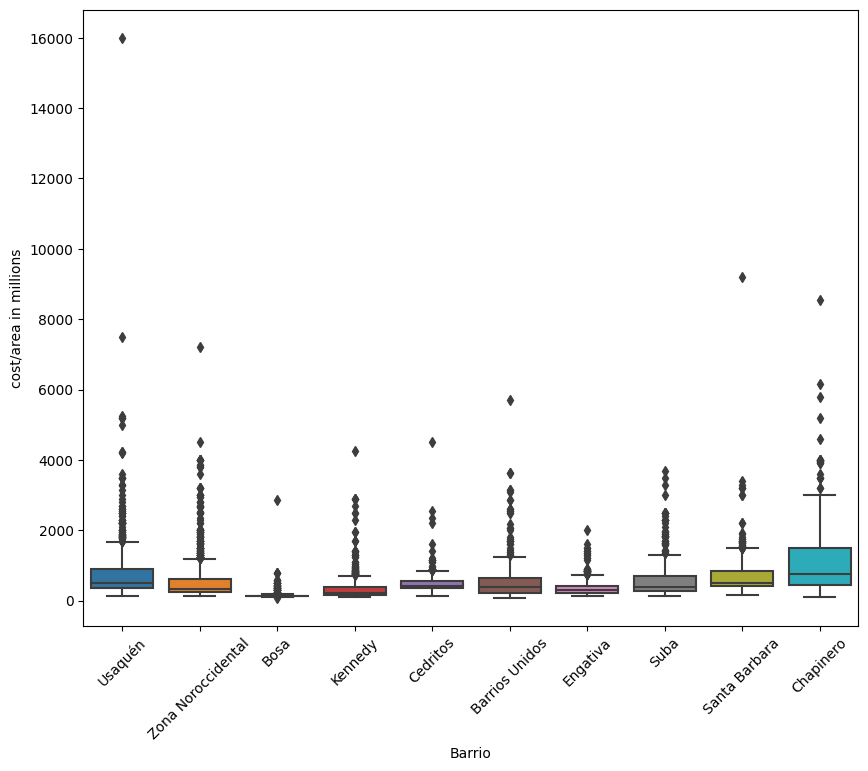

In [148]:
plt.figure(figsize=((10,8)))
ax=sns.boxplot(data=data.query("Barrio in @top_barrios"), x= "Barrio", y="cost_millions", order=top_barrios)
ax.set_ylabel("cost/area in millions")
ax.tick_params(axis="x", rotation=45)
plt.show()

## Bring new datasets and add them to our data

In [149]:
datos_raw=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\Identificación (Capítulo A).csv", encoding="latin-1",sep=";")
datos_raw.head() #enconding is different to utf-8

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.00,11,11001,1,14.00,Los Mártires,37.00,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


In [150]:
datos_raw.shape

(106467, 11)

In [151]:
# Focusing on Bogotá
datos_raw=datos_raw.loc[datos_raw.MPIO == 11001]
datos_raw.shape

(86504, 11)

In [152]:
datos_b=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\Datos de la vivenda y su entorno (Capítulo B).csv", encoding="latin-1",sep=";")
datos_c=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\Condiciones habitacionales del hogar (Capítulo C).csv", encoding="latin-1",sep=";")
datos_e=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\Composición del hogar y demografía (Capítulo E).csv", encoding="latin-1",sep=";")
datos_h=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\Educación (Capitulo H).csv", encoding="latin-1",sep=";")
datos_l=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv", encoding="latin-1",sep=";")
datos_k=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\Fuerza de trabajo (Capítulo K).csv", encoding="latin-1",sep=";")


C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_13128\3849396465.py:2: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_c=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\Condiciones habitacionales del hogar (Capítulo C).csv", encoding="latin-1",sep=";")
C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_13128\3849396465.py:3: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_e=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\Composición del hogar y demografía (Capítulo E).csv", encoding="latin-1",sep=";")
C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_13128\3849396465.py:4: DtypeWarning: Columns (26,81) have mixed types. Specify dtype option on import or set low_memory=False.
  da

In [153]:
datos_dane=pd.merge(datos_raw,datos_b,on="DIRECTORIO",how="left")
datos_dane.shape

(86504, 73)

In [154]:
datos_dane=pd.merge(datos_dane,datos_c,on="DIRECTORIO",how="left")
datos_dane.shape

(87061, 214)

In [155]:
datos_dane=pd.merge(datos_dane,datos_e,on="DIRECTORIO",how="left")
datos_dane.shape

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_13128\1337289417.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  datos_dane=pd.merge(datos_dane,datos_e,on="DIRECTORIO",how="left")


(238559, 281)

In [156]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238559 entries, 0 to 238558
Columns: 281 entries, DIRECTORIO to FEX_C_y
dtypes: float64(140), int64(126), object(15)
memory usage: 513.3+ MB


# Day 4- Creating a machine learning model

In [157]:
datos_dane=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\datos_dane.csv")
datos_dane.head()

,DIRECTORIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,3004368.00,Usaquén,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.00
1,3004369.00,Usaquén,Usaquén,1,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.00
2,3004375.00,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2,2,2,2,2,2,1,...,2,NaN,NaN,2,2,NaN,NaN,1.00,NaN,11.00
3,3004380.00,Usaquén,Los Cedros,1,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.00
4,3004383.00,Fontibón,Ciudad Salitre Occidental,1,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.00


In [158]:
datos_dane.shape

(9857, 55)

In [159]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DIRECTORIO        9857 non-null   float64
 1   NOMBRE_LOCALIDAD  9857 non-null   object 
 2   NOMBRE_ESTRATO    9857 non-null   object 
 3   NVCBP4            9857 non-null   int64  
 4   NVCBP14A          9857 non-null   int64  
 5   NVCBP14D          9857 non-null   int64  
 6   NVCBP14E          9857 non-null   int64  
 7   NVCBP14G          9857 non-null   int64  
 8   NVCBP15A          9857 non-null   int64  
 9   NVCBP15C          9857 non-null   int64  
 10  NVCBP15F          9857 non-null   int64  
 11  NVCBP15G          9857 non-null   int64  
 12  NVCBP16A3         9857 non-null   int64  
 13  NVCBP16A4         9857 non-null   int64  
 14  NPCKP17           9857 non-null   float64
 15  NPCKP18           9857 non-null   float64
 16  NPCKP23           9558 non-null   float64


The first thing we will do is change the column names

In [160]:
dic_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO', 
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES', 
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES', 
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA', 
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19', 
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA', 
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO', 
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA', 
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO', 
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO', 
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

In [161]:
datos_dane.rename(columns=dic_dane,inplace=True)
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DIRECTORIO                 9857 non-null   float64
 1   NOMBRE_LOCALIDAD           9857 non-null   object 
 2   NOMBRE_ESTRATO             9857 non-null   object 
 3   CONJUNTO_CERRADO           9857 non-null   int64  
 4   FABRICAS_CERCA             9857 non-null   int64  
 5   TERMINALES_BUS             9857 non-null   int64  
 6   BARES_DISCO                9857 non-null   int64  
 7   OSCURO_PELIGROSO           9857 non-null   int64  
 8   RUIDO                      9857 non-null   int64  
 9   INSEGURIDAD                9857 non-null   int64  
 10  BASURA_INADECUADA          9857 non-null   int64  
 11  INVASION                   9857 non-null   int64  
 12  MOV_ADULTOS_MAYORES        9857 non-null   int64  
 13  MOV_NINOS_BEBES            9857 non-null   int64

In [162]:
datos_dane.head()

,DIRECTORIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,CONJUNTO_CERRADO,FABRICAS_CERCA,TERMINALES_BUS,BARES_DISCO,OSCURO_PELIGROSO,RUIDO,INSEGURIDAD,...,COMO_NIVEL_VIDA,REACCION_OPORTUNA_POLICIA,COMO_TRANSPORTE_URBANO,SON_INGRESOS_SUFICIENTES,SE_CONSIDERA_POBRE,MED_C19_TRABAJO,MED_C19_CAMBIO_VIVIENDA,MED_C19_ENDEUDAMIENTO,MED_C19_VENTA_BIENES,NIVEL_EDUCATIVO
0,3004368.00,Usaquén,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.00
1,3004369.00,Usaquén,Usaquén,1,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.00
2,3004375.00,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2,2,2,2,2,2,1,...,2,NaN,NaN,2,2,NaN,NaN,1.00,NaN,11.00
3,3004380.00,Usaquén,Los Cedros,1,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.00
4,3004383.00,Fontibón,Ciudad Salitre Occidental,1,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.00


Then groupby "NOMBRE_ESTRATO" and gives us not all columns, just a few ones

NOMBRE_ESTRATO = UPZ name

show the mean of all columns

In [163]:
datos_dane.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean().head()

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,1.89,1.19,1.85,1.89,1.56,1.84,1493859.61,1.16,1.92,1.68,1.80
Américas,1.38,1.25,1.98,1.79,1.61,1.92,2672138.14,1.06,1.97,1.72,1.85
Apogeo,1.65,1.30,1.75,1.94,1.68,2.00,1837583.18,1.08,1.92,1.65,1.92
Arborizadora,1.43,1.30,1.95,1.88,1.69,1.84,1802296.76,1.03,1.88,1.61,1.82
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,1.37,1.33,1.99,1.98,1.70,1.87,2943730.73,1.05,1.95,1.70,1.94


In [164]:
datos=datos_dane[['NOMBRE_ESTRATO','CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace(2,0)
datos.head()

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,0,0,0,0,0,99.00,1.00,0,0,0
1,Usaquén,1,0,0,0,0,0,10000000.00,1.00,0,0,0
2,CHAPINERO: Pardo Rubio + Chapinero,0,1,0,0,0,0,4000000.00,1.00,0,1,0
3,Los Cedros,1,0,0,0,0,0,5000000.00,1.00,0,1,0
4,Ciudad Salitre Occidental,1,0,0,0,1,0,3500000.00,1.00,0,1,1


In [165]:
datos_tratados=datos.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()
datos_tratados

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,0.11,0.81,0.15,0.11,0.44,0.16,1493859.61,0.84,0.08,0.32,0.20
Américas,0.62,0.75,0.02,0.21,0.39,0.08,2672138.14,0.94,0.03,0.28,0.15
Apogeo,0.35,0.70,0.25,0.06,0.32,0.00,1837583.18,0.92,0.08,0.35,0.08
Arborizadora,0.57,0.70,0.05,0.12,0.31,0.16,1802296.76,0.97,0.12,0.39,0.18
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,0.63,0.67,0.01,0.02,0.30,0.13,2943730.73,0.95,0.05,0.30,0.06
...,...,...,...,...,...,...,...,...,...,...,...
Usaquén,0.90,0.22,0.01,0.03,0.20,0.01,4670896.88,0.97,0.02,0.17,0.12
Venecia,0.47,0.82,0.24,0.29,0.50,0.36,2078712.71,0.83,0.14,0.40,0.25
Verbenal,0.77,0.56,0.08,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09


In [166]:
datos_ml=pd.merge(data,datos_tratados, left_on="UPZ", right_on="NOMBRE_ESTRATO", how="left")
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9520 entries, 0 to 9519
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9520 non-null   object 
 1   Descripcion               9520 non-null   object 
 2   Habitaciones              9520 non-null   int64  
 3   Banos                     9520 non-null   int64  
 4   Area                      9520 non-null   int64  
 5   Barrio                    9520 non-null   object 
 6   UPZ                       9478 non-null   object 
 7   Valor                     9520 non-null   object 
 8   cost_millions             9520 non-null   float64
 9   c_a_m                     9520 non-null   float64
 10  CONJUNTO_CERRADO          9366 non-null   float64
 11  INSEGURIDAD               9366 non-null   float64
 12  TERMINALES_BUS            9366 non-null   float64
 13  BARES_DISCO               9366 non-null   float64
 14  RUIDO   

For our Machine Learning model, we will use a linear regression, so all columns must be numeric type

In [167]:
upz=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\cod_upz.csv")

In [168]:
upz.head()

,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,SANTA FE: Las Nieves + Sagrado Corazón,814.00
1,Santa Isabel,37.00
2,USAQUÉN: Country Club + Santa Bárbara,803.00
3,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Ciudad Salitre Occidental,110.00


In [177]:
upz.shape

(95, 2)

In [169]:
datos_ml=pd.merge(datos_ml,upz,left_on="UPZ",right_on="NOMBRE_ESTRATO", how="inner") #Inner = Interjection rows of both datasets

In [170]:
datos_ml.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,cost_millions,c_a_m,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.00,4.57,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,300.00,4.94,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,2519.00,4.57,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,239.00,4.57,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,1600.00,4.57,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00


In [176]:
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9318 entries, 0 to 9317
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9318 non-null   object 
 1   Descripcion               9318 non-null   object 
 2   Habitaciones              9318 non-null   int64  
 3   Banos                     9318 non-null   int64  
 4   Area                      9318 non-null   int64  
 5   Barrio                    9318 non-null   object 
 6   UPZ                       9318 non-null   object 
 7   Valor                     9318 non-null   object 
 8   cost_millions             9318 non-null   float64
 9   c_a_m                     9318 non-null   float64
 10  CONJUNTO_CERRADO          9318 non-null   float64
 11  INSEGURIDAD               9318 non-null   float64
 12  TERMINALES_BUS            9318 non-null   float64
 13  BARES_DISCO               9318 non-null   float64
 14  RUIDO   

In [178]:
datos_ml.shape

(9318, 23)

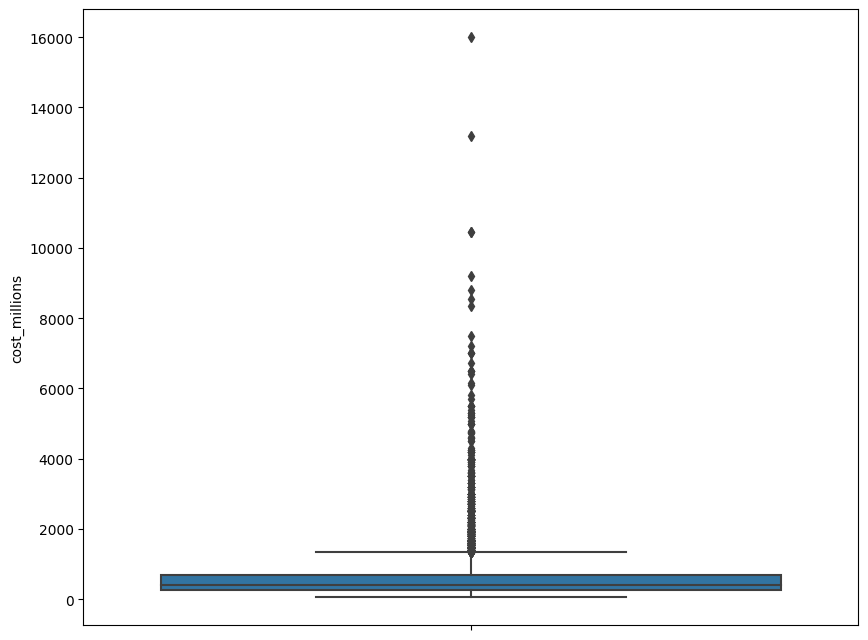

In [180]:
plt.figure(figsize=((10,8)))
sns.boxplot(data=datos_ml, y="cost_millions")
plt.show()

Remove outlayers up to 5000 and below 60 millons

In [187]:
datos_ml=datos_ml.query("cost_millions < 5000 & cost_millions > 60")
datos_ml.shape

(9277, 23)

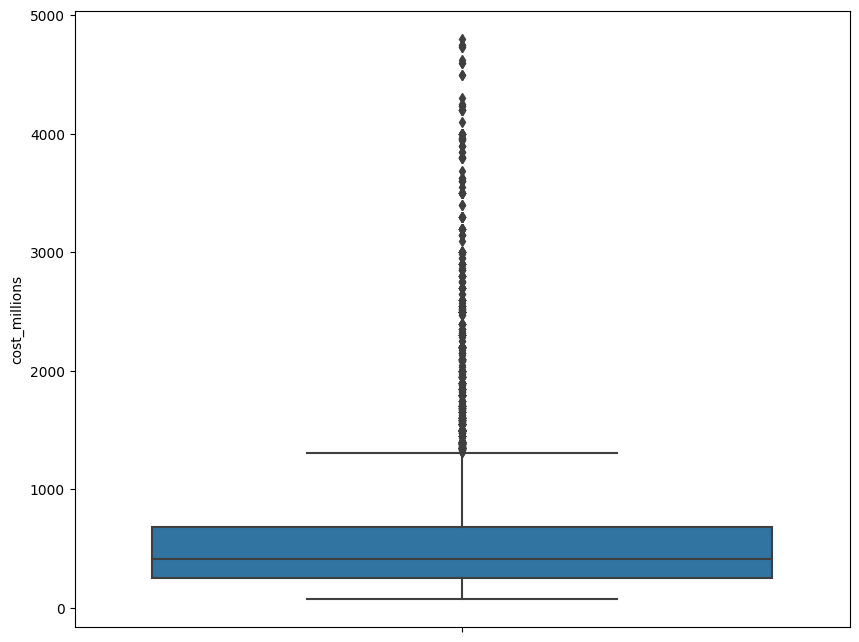

In [188]:
plt.figure(figsize=((10,8)))
sns.boxplot(data=datos_ml, y="cost_millions")
plt.show()

In [193]:
datos_ml["ANNUAL_SALARY_MILLIONS"]=datos_ml.SALARIO_MES*12/1000000
datos_ml.ANNUAL_SALARY_MILLIONS

0      48.42
1      48.42
2      48.42
3      48.42
4      48.42
        ... 
9313   29.34
9314   29.34
9315   29.34
9316   29.34
9317   29.34
Name: ANNUAL_SALARY_MILLIONS, Length: 9277, dtype: float64

In [202]:
datos_ml.shape

(9277, 24)

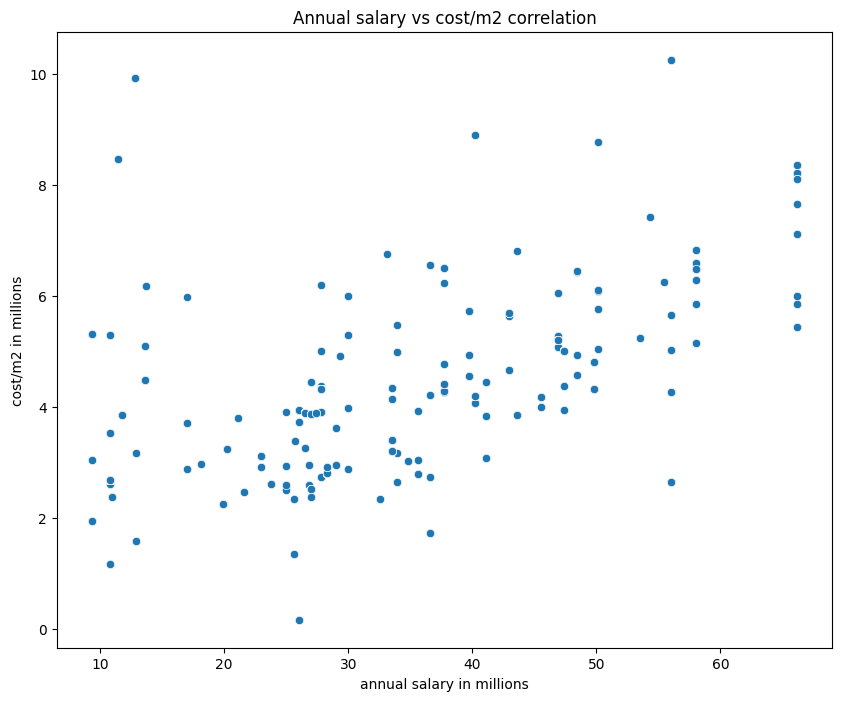

In [201]:
plt.figure(figsize=((10,8)))
gp=sns.scatterplot(data=datos_ml, x="ANNUAL_SALARY_MILLIONS", y="c_a_m")
gp.set_title("Annual salary vs cost/m2 correlation")
gp.set_ylabel("cost/m2 in millions")
gp.set_xlabel("annual salary in millions")
#plt.ylim(0,20)
plt.show()

In [204]:
datos_ml.corr(numeric_only=True) #how all columns are related each other

,Habitaciones,Banos,Area,cost_millions,c_a_m,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,ANNUAL_SALARY_MILLIONS
Habitaciones,1.00,0.48,0.03,0.22,-0.18,-0.11,0.12,0.06,0.11,0.13,0.10,-0.15,-0.06,0.06,0.11,0.07,-0.09,-0.15
Banos,0.48,1.00,0.06,0.65,0.16,0.16,-0.19,-0.16,-0.08,-0.18,-0.20,0.20,0.12,-0.09,-0.15,-0.10,0.07,0.20
Area,0.03,0.06,1.00,0.05,-0.03,-0.01,-0.01,-0.01,-0.01,-0.00,0.01,-0.00,-0.01,0.01,0.01,0.01,-0.00,-0.00
cost_millions,0.22,0.65,0.05,1.00,0.32,0.21,-0.26,-0.18,-0.09,-0.25,-0.23,0.32,0.11,-0.13,-0.22,-0.17,0.20,0.32
c_a_m,-0.18,0.16,-0.03,0.32,1.00,0.64,-0.66,-0.37,-0.41,-0.66,-0.59,0.82,0.37,-0.31,-0.64,-0.25,0.41,0.82
CONJUNTO_CERRADO,-0.11,0.16,-0.01,0.21,0.64,1.00,-0.84,-0.29,-0.51,-0.70,-0.66,0.80,0.60,-0.35,-0.78,0.04,0.09,0.80
INSEGURIDAD,0.12,-0.19,-0.01,-0.26,-0.66,-0.84,1.00,0.50,0.60,0.85,0.75,-0.81,-0.54,0.30,0.74,0.10,-0.01,-0.81
TERMINALES_BUS,0.06,-0.16,-0.01,-0.18,-0.37,-0.29,0.50,1.00,0.38,0.66,0.57,-0.52,-0.29,0.18,0.35,0.26,-0.11,-0.52
BARES_DISCO,0.11,-0.08,-0.01,-0.09,-0.41,-0.51,0.60,0.38,1.00,0.60,0.51,-0.38,-0.25,-0.02,0.33,-0.06,0.27,-0.38
RUIDO,0.13,-0.18,-0.00,-0.25,-0.66,-0.70,0.85,0.66,0.60,1.00,0.66,-0.77,-0.60,0.30,0.67,0.17,-0.12,-0.77


Making a heat map

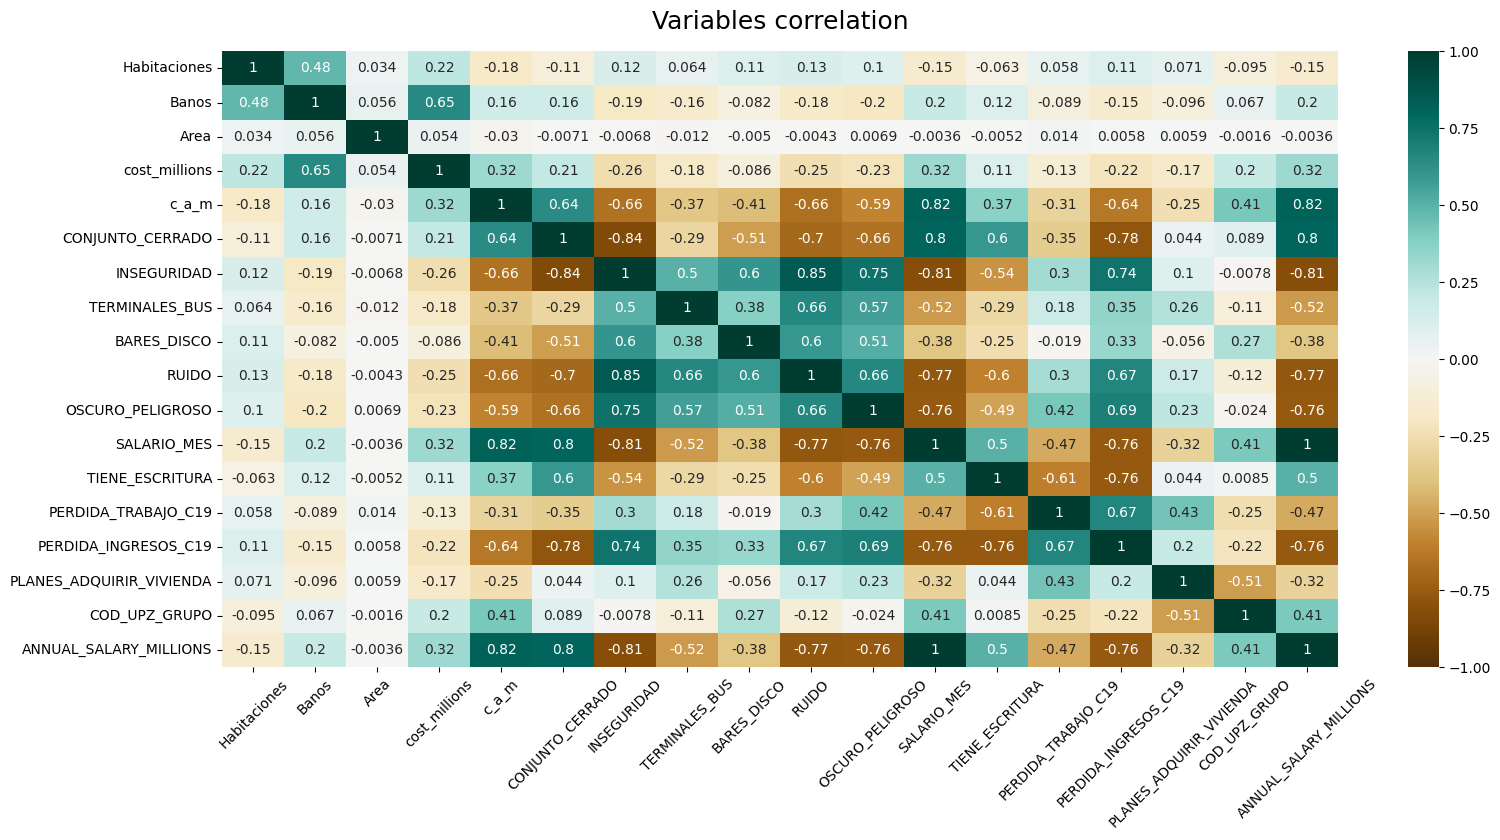

In [209]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(datos_ml.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variables correlation', fontdict={'fontsize':18}, pad=16)
heatmap.tick_params(axis="x", rotation=45)

We'll divide our dataset into training and test datasets using scikit-learn to make the aleatory seleccion

In [228]:
X = datos_ml["COD_UPZ_GRUPO"]
y=datos_ml["c_a_m"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=99) #random_state = seed

In [229]:
X_train


7578   810.00
8345    98.00
1246   816.00
8491   809.00
4602    47.00
        ...  
5223    19.00
7929    85.00
1784   817.00
3268    14.00
7242    20.00
Name: COD_UPZ_GRUPO, Length: 6957, dtype: float64

In [235]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
modelo=LinearRegression()
modelo.fit(X_train.array.reshape(-1, 1),y_train.array.reshape(-1, 1))

LinearRegression()

In [234]:
y_predict=modelo.predict(X_test.array.reshape(-1, 1))

KPI's to see if your model is good

- Mean Absolute Error (MAE)
- R^2

In [236]:
baseline_mae=mean_absolute_error(y_test,y_predict)
baseline_mae

1.1381882969944337

In [237]:
baseline_r2=r2_score(y_test,y_predict)
baseline_r2

0.1428219494799452

In [242]:
X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Banos','CONJUNTO_CERRADO','ANNUAL_SALARY_MILLIONS','TIENE_ESCRITURA']] #

Y = datos_ml["cost_millions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

0.5493359810165146 0.6806107407815678
0.5788172027116761 0.6802582766242908


In [243]:
modelo_1.predict([[816,3,2,1,50,1]]) #the entered data must be also a dataframe

c:\Users\Emmanuel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.44312642])